<a href="https://colab.research.google.com/github/moritamu/Tanjyou/blob/main/AI%E3%83%AA%E3%83%86%E3%83%A9%E3%82%B7%E3%83%BC14%E8%AC%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### リスト14-1

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

import pandas as pd
df = pd.DataFrame(wine.data, columns = wine.feature_names)

df['class'] = wine.target 
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### リスト14-2

In [ ]:
x = df.drop(['class'], axis = 1)
y = df['class']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size = 0.7, test_size = 0.3, random_state = 0)  

### リスト14-3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.predict(x_test)

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2])

### リスト14-4

In [ ]:
print('正解率(train):{:.3f}'.format(model.score(x_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(x_test, y_test)))

正解率(train):1.000
正解率(test):0.963


### リスト14-5

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd
df = pd.DataFrame(boston.data, columns = boston.feature_names)

df['MEDV'] = boston.target 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### リスト14-6

In [ ]:
x = df[['RM']]
y = df['MEDV']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size = 0.7, test_size = 0.3, random_state = 0) 

### リスト14-7

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print('intercept = ', model.intercept_)
print(pd.DataFrame({"Name":x_train.columns,
                    "Coefficients":model.coef_}).sort_values(by='Coefficients'))

intercept =  -35.99434897818352
  Name  Coefficients
0   RM      9.311328


### リスト14-8

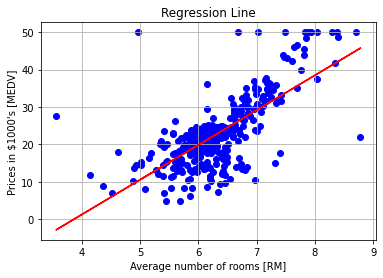

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color = 'blue')        
plt.plot(x_train, model.predict(x_train), color = 'red') 
plt.title('Regression Line')               
plt.xlabel('Average number of rooms [RM]') 
plt.ylabel('Prices in $1000\'s [MEDV]')    
plt.grid()                                 
plt.show()  

### リスト14-9

In [ ]:
from sklearn.metrics import r2_score
print('r^2 (train): ', r2_score(y_train, model.predict(x_train)))
print('r^2 (test): ', r2_score(y_test, model.predict(x_test)))

r^2 (train):  0.5026497630040827
r^2 (test):  0.43514364832115193


### リスト14-10

In [ ]:
import pandas as pd
df = pd.read_csv('basket_data.csv')
df

,date,customer_id,item_name
0,2000/1/1,1,yogurt
1,2000/1/1,1,pork
2,2000/1/1,1,sandwich bags
3,2000/1/1,1,lunch meat
4,2000/1/1,1,all- purpose
...,...,...,...
22338,2002/2/26,1139,soda
22339,2002/2/26,1139,laundry detergent
22340,2002/2/26,1139,vegetables
22341,2002/2/26,1139,shampoo


### リスト14-11

In [ ]:
dataset = df.groupby('customer_id')['item_name'].apply(list)
dataset

customer_id
1       [yogurt, pork, sandwich bags, lunch meat, all-...
2       [toilet paper, shampoo, hand soap, waffles, ve...
3       [soda, pork, soap, ice cream, toilet paper, di...
4       [cereals, juice, lunch meat, soda, toilet pape...
5       [sandwich loaves, pasta, tortillas, mixes, han...
                              ...                        
1135    [sugar, beef, sandwich bags, hand soap, paper ...
1136    [coffee/tea, dinner rolls, lunch meat, spaghet...
1137    [beef, lunch meat, eggs, poultry, vegetables, ...
1138    [sandwich bags, ketchup, milk, poultry, cheese...
1139    [soda, laundry detergent, vegetables, shampoo,...
Name: item_name, Length: 1139, dtype: object

### リスト14-12

In [ ]:
!pip install mlxtend

### リスト14-13

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df2, min_support=0.04, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
19600,0.040386,"(laundry detergent, poultry, vegetables, spagh..."
19601,0.042142,"(sugar, poultry, toilet paper, vegetables, lun..."
19602,0.042142,"(soap, vegetables, lunch meat, waffles, soda)"
19603,0.040386,"(poultry, vegetables, yogurt, milk, mixes)"


### リスト14-14

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules = rules.sort_values('support', ascending = False).reset_index(drop=True)

display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(vegetables),(poultry),0.739245,0.421422,0.331870,0.448931,1.065276,0.020336,1.049919
1,(poultry),(vegetables),0.421422,0.739245,0.331870,0.787500,1.065276,0.020336,1.227083
2,(eggs),(vegetables),0.389816,0.739245,0.326602,0.837838,1.133370,0.038433,1.607989
3,(vegetables),(eggs),0.739245,0.389816,0.326602,0.441805,1.133370,0.038433,1.093139
4,(vegetables),(yogurt),0.739245,0.384548,0.319579,0.432304,1.124188,0.035304,1.084123
...,...,...,...,...,...,...,...,...,...
197939,"(toilet paper, sandwich loaves)","(ketchup, cheeses)",0.142230,0.160667,0.040386,0.283951,1.767321,0.017535,1.172172
197940,"(toilet paper, cheeses)","(ketchup, sandwich loaves)",0.167691,0.152766,0.040386,0.240838,1.576518,0.014769,1.116012
197941,(ketchup),"(toilet paper, sandwich loaves, cheeses)",0.371378,0.069359,0.040386,0.108747,1.567885,0.014628,1.044194
197942,(sandwich loaves),"(ketchup, cheeses, toilet paper)",0.349429,0.074627,0.040386,0.115578,1.548744,0.014309,1.046303
